In [10]:
from sklearn.datasets import load_iris, load_wine
import seaborn as sns
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo

In [79]:
iris_dataset = load_iris(as_frame=True)
print(iris_dataset.data.head())
print(iris_dataset.target.tail())
iris_dataset.frame.head()
print(iris_dataset.feature_names)
iris_dataset.frame = pd.concat([iris_dataset.frame, pd.DataFrame({"species" : [iris_dataset.target_names[x] for x in iris_dataset.frame.target]})], axis=1)
iris_dataset.frame.head()

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
145    2
146    2
147    2
148    2
149    2
Name: target, dtype: int64
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


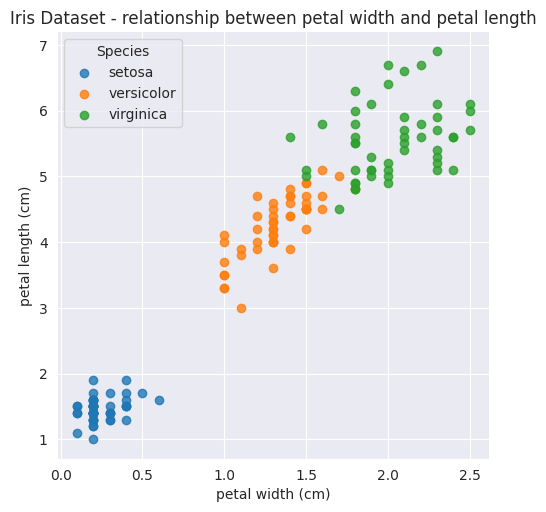

In [83]:
# sns.scatterplot(data=iris_dataset.frame, x="petal width (cm)", y="petal length (cm)", hue="species", palette="deep", alpha=1, legend="auto")
sns.lmplot(data=iris_dataset.frame, x="petal width (cm)", y="petal length (cm)", hue="species", fit_reg=False, legend=False)
plt.legend(title="Species")
plt.title("Iris Dataset - relationship between petal width and petal length")
plt.show()

Text(0.5, 1.02, 'Iris dataset - analysis of features')

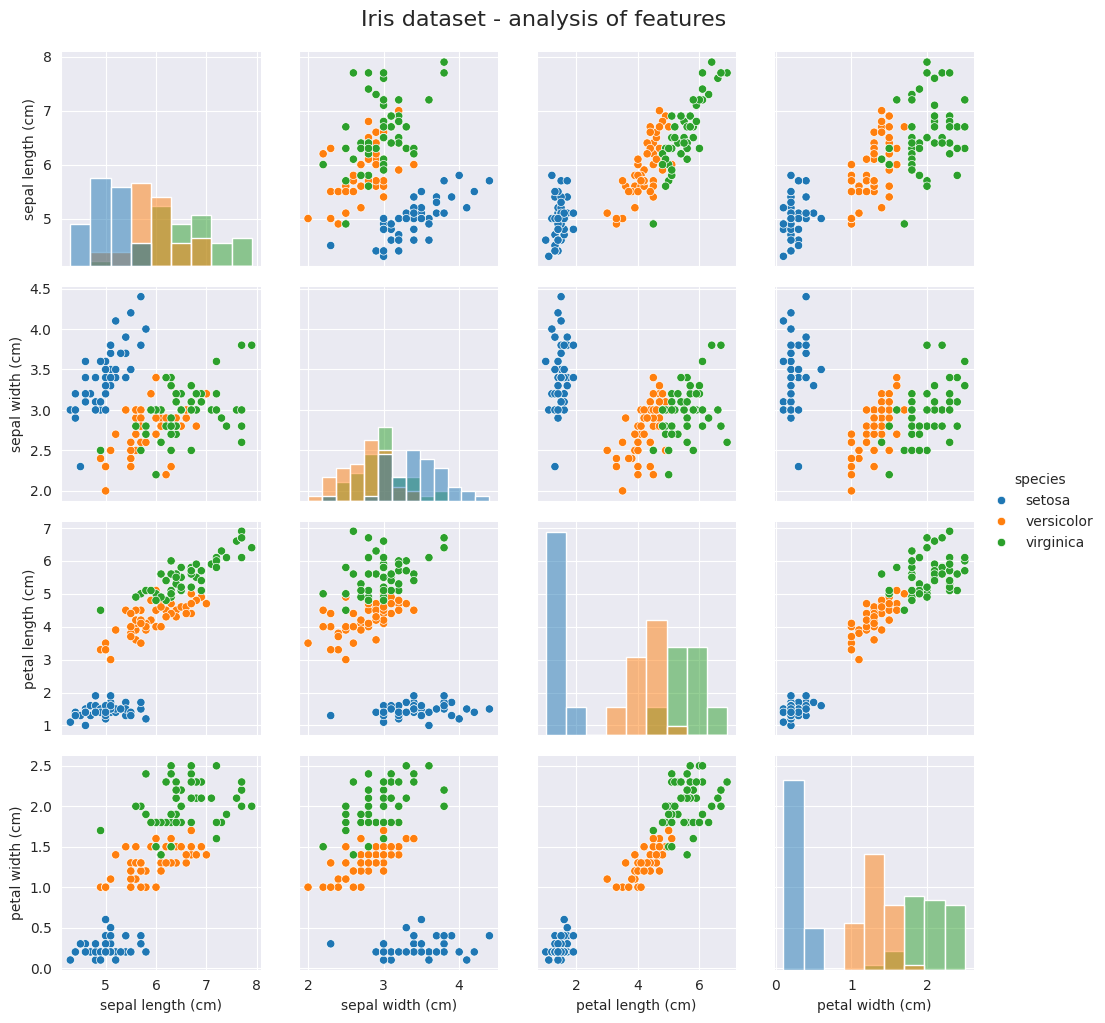

In [13]:
grid = sns.PairGrid(data=iris_dataset.frame[iris_dataset.feature_names + ["species"]], hue="species")
grid.map_offdiag(sns.scatterplot)
grid.map_diag(sns.histplot)
grid.add_legend(title="species")
grid.fig.suptitle("Iris dataset - analysis of features", fontsize=16, y=1.02)

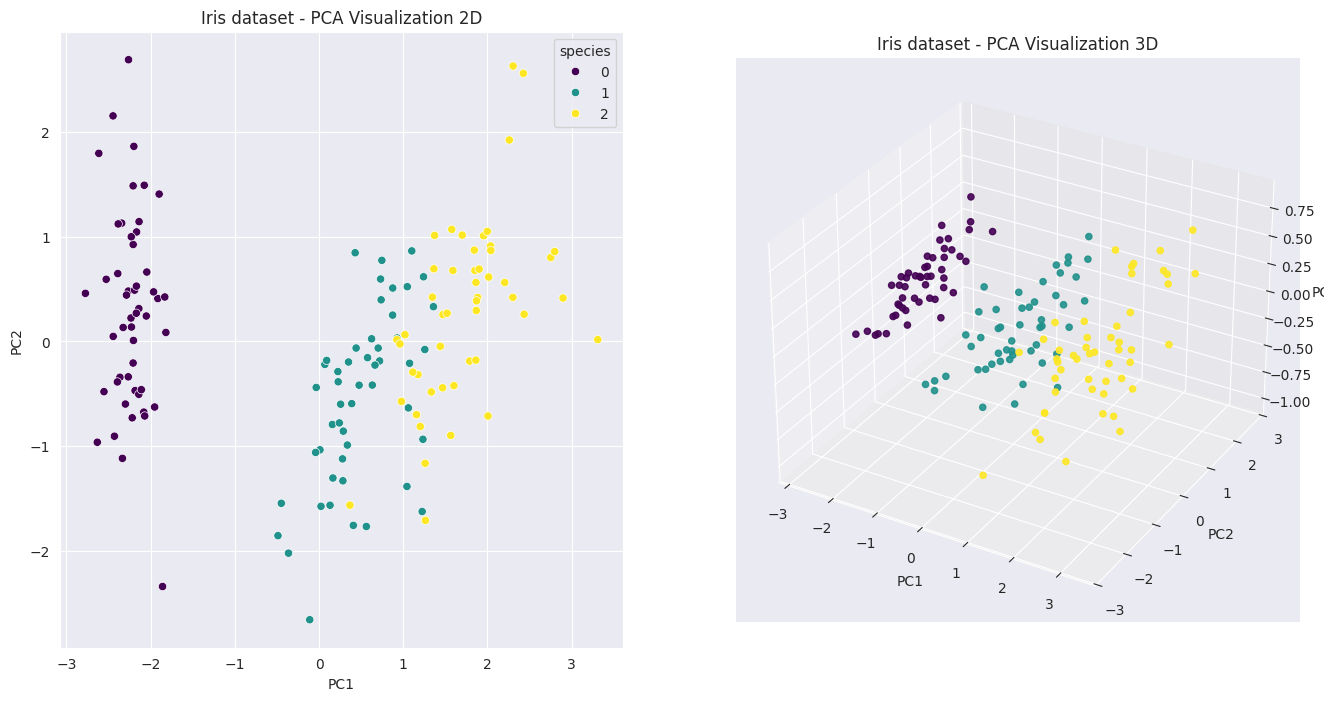

In [26]:
data_reduced = PCA(n_components=2).fit_transform(iris_dataset.data)
data_reduced = pd.DataFrame(data_reduced, columns=["PC1", "PC2"])
data_reduced["species"] = iris_dataset.frame["target"]
fig = plt.figure(figsize = (16, 8))
ax1 = fig.add_subplot(121)
sns.scatterplot(data=data_reduced, x="PC1", y="PC2", hue="species", palette="viridis", ax=ax1)
plt.legend(title="species")
plt.title("Iris dataset - PCA Visualization 2D")

data_reduced_iris_3d = PCA(n_components=3).fit_transform(iris_dataset.data)
data_reduced_iris_3d = pd.DataFrame(data_reduced_iris_3d, columns=["PC1", "PC2", "PC3"])
data_reduced_iris_3d["species"] = iris_dataset.frame["target"]
ax2 = fig.add_subplot(122, projection="3d")
ax2.scatter(data_reduced_iris_3d["PC1"], data_reduced_iris_3d["PC2"], data_reduced_iris_3d["PC3"], c=data_reduced_iris_3d["species"], cmap="viridis", alpha=0.9)
ax2.set_xlabel("PC1")
ax2.set_ylabel("PC2")
ax2.set_zlabel("PC3")
ax2.set_title("Iris dataset - PCA Visualization 3D")
plt.show()

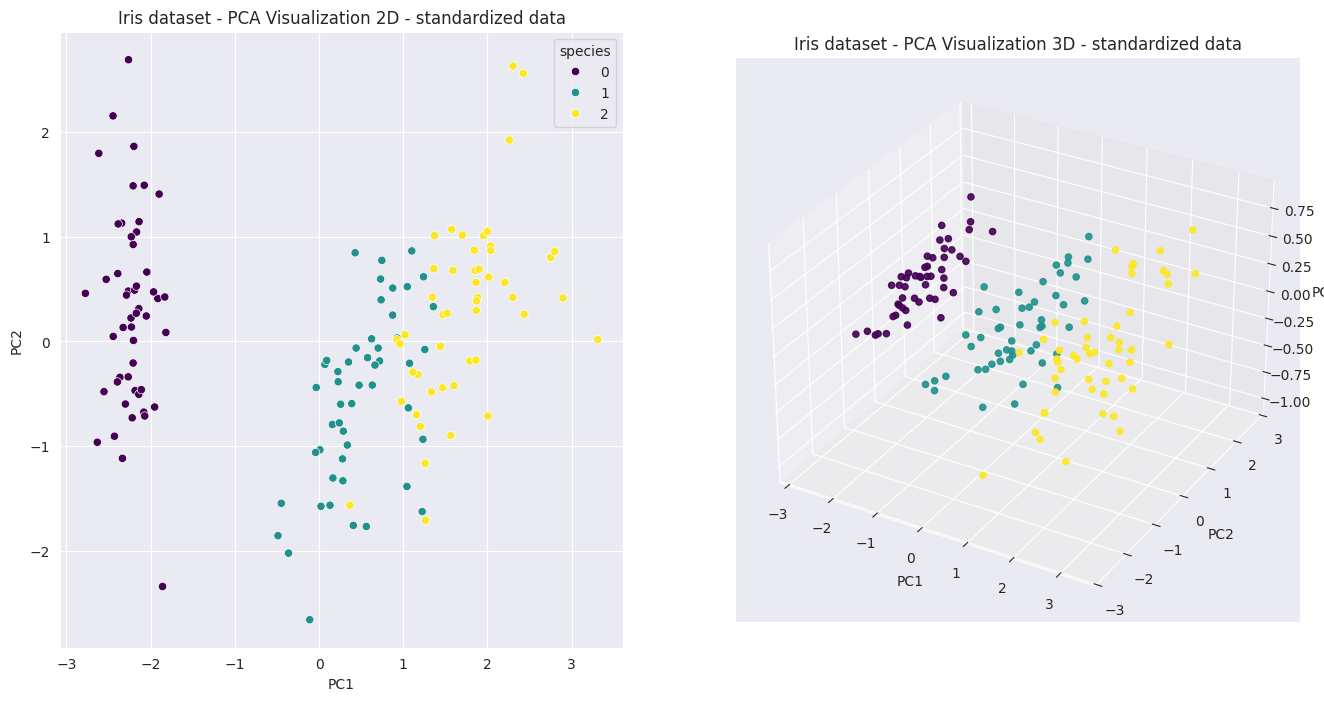

In [84]:
scaler = StandardScaler()
iris_dataset.data = scaler.fit_transform(iris_dataset.data)
data_reduced = PCA(n_components=2).fit_transform(iris_dataset.data)
data_reduced = pd.DataFrame(data_reduced, columns=["PC1", "PC2"])
data_reduced["species"] = iris_dataset.frame["target"]
fig = plt.figure(figsize = (16, 8))
ax1 = fig.add_subplot(121)
sns.scatterplot(data=data_reduced, x="PC1", y="PC2", hue="species", palette="viridis", ax=ax1)
plt.legend(title="species")
plt.title("Iris dataset - PCA Visualization 2D - standardized data")

data_reduced_iris_3d = PCA(n_components=3).fit_transform(iris_dataset.data)
data_reduced_iris_3d = pd.DataFrame(data_reduced_iris_3d, columns=["PC1", "PC2", "PC3"])
data_reduced_iris_3d["species"] = iris_dataset.frame["target"]
ax2 = fig.add_subplot(122, projection="3d")
ax2.scatter(data_reduced_iris_3d["PC1"], data_reduced_iris_3d["PC2"], data_reduced_iris_3d["PC3"], c=data_reduced_iris_3d["species"], cmap="viridis", alpha=0.9)
ax2.set_xlabel("PC1")
ax2.set_ylabel("PC2")
ax2.set_zlabel("PC3")
ax2.set_title("Iris dataset - PCA Visualization 3D - standardized data")
plt.show()

In [32]:
wine = load_wine(as_frame=True)
print(wine.data.shape)
print(wine.data.head())
print(wine.target.head())
print(wine.feature_names)
print(wine.target_names)

(178, 13)
   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  
0        

In [16]:
wine.frame["class"] = [wine.target_names[target] for target in wine.target]
wine.frame.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0,class_0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0,class_0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0,class_0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0,class_0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0,class_0


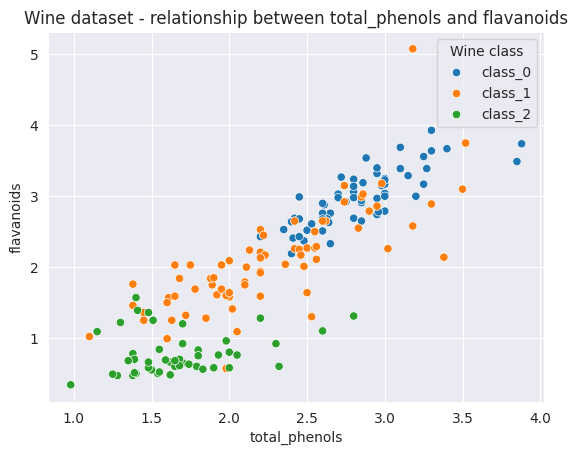

In [17]:
sns.scatterplot(data=wine.frame, x="total_phenols", y="flavanoids", hue="class")
plt.legend(title="Wine class")
plt.title("Wine dataset - relationship between total_phenols and flavanoids")
plt.show()

Text(0.5, 1.02, 'Wine dataset - feature analysis')

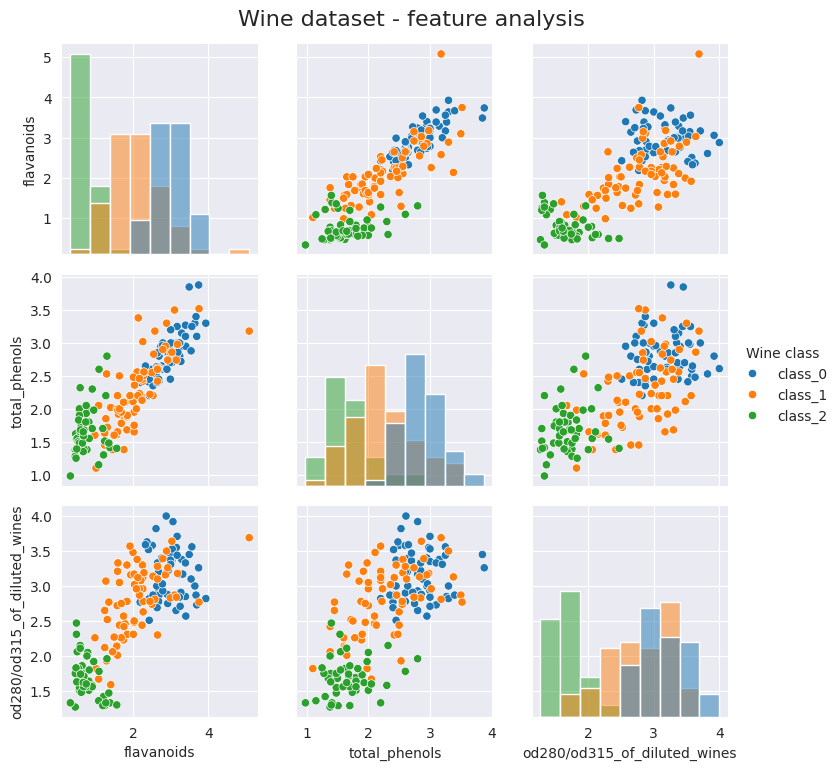

In [18]:
grid_wine = sns.PairGrid(data=wine.frame[["flavanoids", "total_phenols", "od280/od315_of_diluted_wines", "class"]], hue="class")
grid_wine.map_offdiag(sns.scatterplot)
grid_wine.map_diag(sns.histplot)
grid_wine.add_legend(title="Wine class")
grid_wine.fig.suptitle("Wine dataset - feature analysis", fontsize=16, y=1.02)

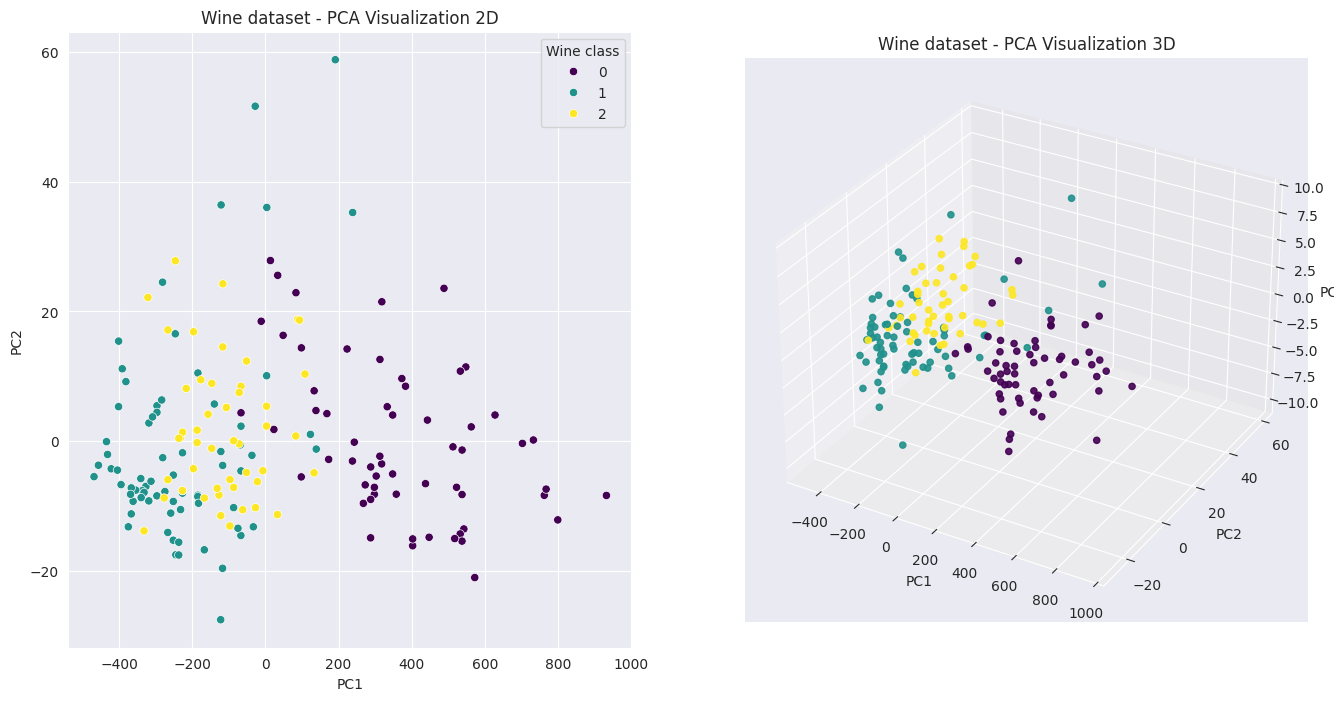

In [33]:
data_reduced_wine_2d = PCA(n_components=2).fit_transform(wine.data)
data_reduced_wine_2d = pd.DataFrame(data_reduced_wine_2d, columns=["PC1", "PC2"])
data_reduced_wine_2d["class"] = wine.frame["target"]
fig = plt.figure(figsize=(16, 8))
ax1 = fig.add_subplot(121)
sns.scatterplot(data=data_reduced_wine_2d, x="PC1", y="PC2", hue="class", palette="viridis", ax=ax1)
plt.legend(title="Wine class")
plt.title("Wine dataset - PCA Visualization 2D")

data_reduced_wine_3d = PCA(n_components=3).fit_transform(wine.data)
data_reduced_wine_3d = pd.DataFrame(data_reduced_wine_3d, columns=["PC1", "PC2", "PC3"])
data_reduced_wine_3d["class"] = wine.frame["target"]
ax2 = fig.add_subplot(122, projection="3d")
ax2.scatter(data_reduced_wine_3d["PC1"], data_reduced_wine_3d["PC2"], data_reduced_wine_3d["PC3"], c=data_reduced_wine_3d["class"], cmap="viridis", alpha=0.9)
ax2.set_xlabel("PC1")
ax2.set_ylabel("PC2")
ax2.set_zlabel("PC3")
ax2.set_title("Wine dataset - PCA Visualization 3D")
plt.show()

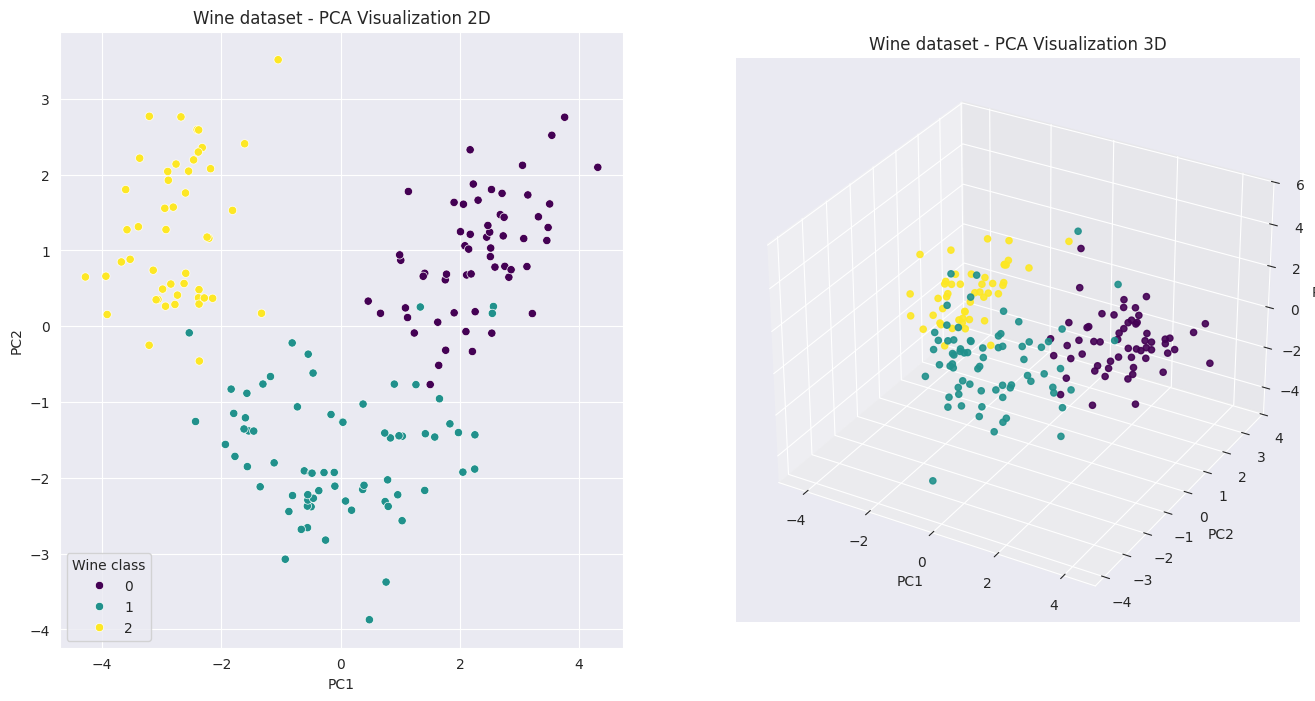

In [57]:
scaler = StandardScaler()
wine.data = scaler.fit_transform(wine.data)
grid_wine.fig.suptitle("Wine dataset - feature analysis", fontsize=16, y=1.02)
data_reduced_wine_2d = PCA(n_components=2).fit_transform(wine.data)
data_reduced_wine_2d = pd.DataFrame(data_reduced_wine_2d, columns=["PC1", "PC2"])
data_reduced_wine_2d["class"] = wine.frame["target"]
fig = plt.figure(figsize=(16, 8))
ax1 = fig.add_subplot(121)
sns.scatterplot(data=data_reduced_wine_2d, x="PC1", y="PC2", hue="class", palette="viridis", ax=ax1)
plt.legend(title="Wine class")
plt.title("Wine dataset - PCA Visualization 2D")

data_reduced_wine_3d = PCA(n_components=3).fit_transform(wine.data)
data_reduced_wine_3d = pd.DataFrame(data_reduced_wine_3d, columns=["PC1", "PC2", "PC3"])
data_reduced_wine_3d["class"] = wine.frame["target"]
ax2 = fig.add_subplot(122, projection="3d")
ax2.scatter(data_reduced_wine_3d["PC1"], data_reduced_wine_3d["PC2"], data_reduced_wine_3d["PC3"],
            c=data_reduced_wine_3d["class"], cmap="viridis", alpha=0.9)
ax2.set_xlabel("PC1")
ax2.set_ylabel("PC2")
ax2.set_zlabel("PC3")
ax2.set_title("Wine dataset - PCA Visualization 3D")
plt.show()

In [71]:
glass = fetch_ucirepo(id=42)
glass.data.features.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0


In [64]:
glass.data.targets.head()

,Type_of_glass
0,1
1,1
2,1
3,1
4,1


In [72]:
glass_frame = pd.concat([glass.data.features, glass.data.targets], axis=1)
glass_frame.head()
print(type(glass_frame))

<class 'pandas.core.frame.DataFrame'>


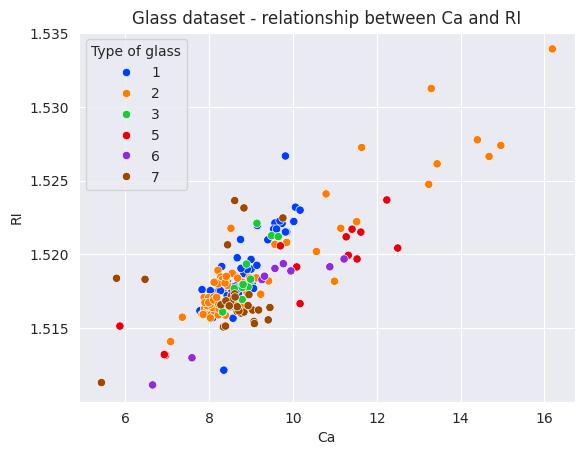

In [66]:
sns.scatterplot(data=glass_frame, x="Ca", y="RI", hue="Type_of_glass", palette="bright")
plt.legend(title="Type of glass")
plt.title("Glass dataset - relationship between Ca and RI")
plt.show()

Text(0.5, 1.02, 'Glass dataset - feature analysis')

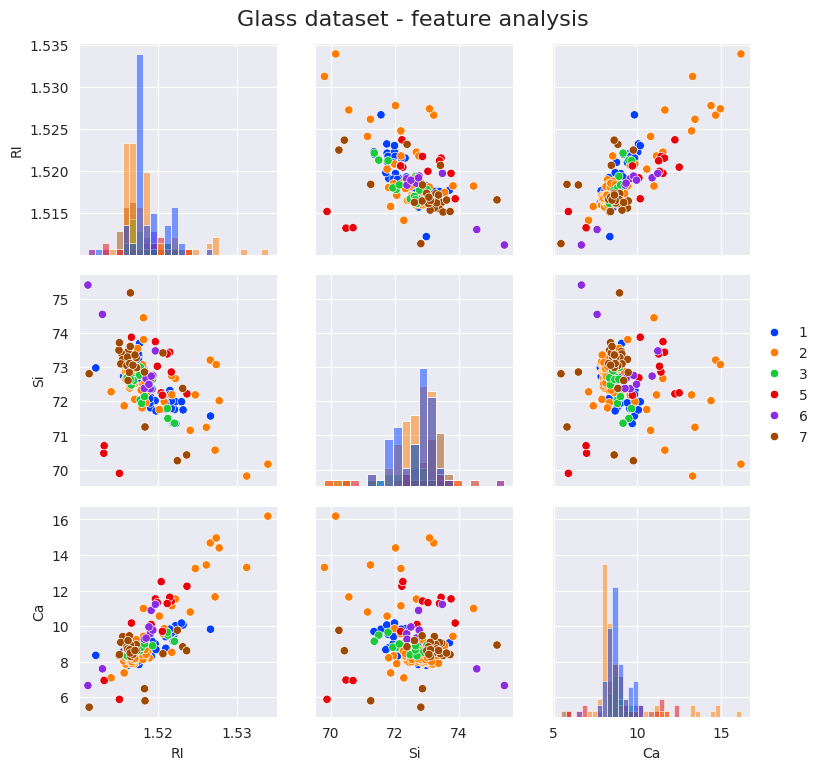

In [67]:
grid_glass = sns.PairGrid(data=glass_frame[["RI","Si", "Ca", "Type_of_glass"]], hue="Type_of_glass", palette="bright")
grid_glass.map_offdiag(sns.scatterplot)
grid_glass.map_diag(sns.histplot)
grid_glass.add_legend(title="")
grid_glass.fig.suptitle("Glass dataset - feature analysis", fontsize=16, y=1.02)

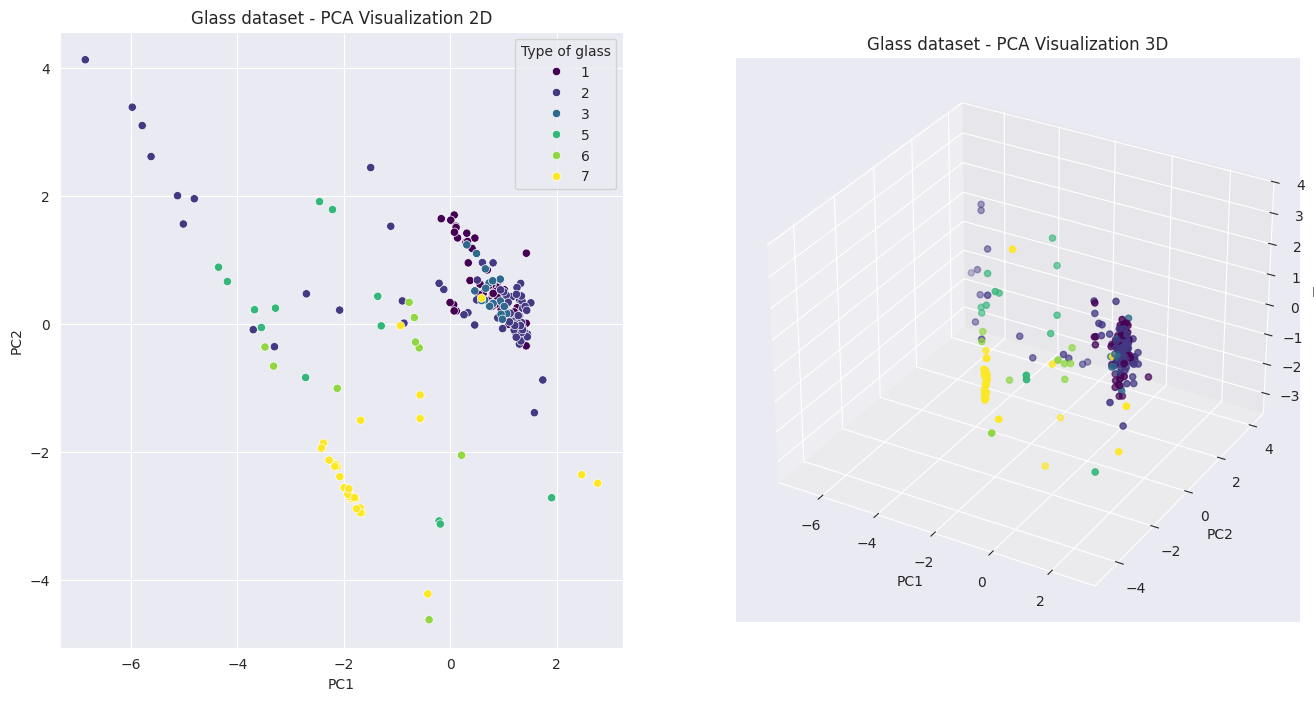

In [73]:
data_reduced_glass_2d = PCA(n_components=2).fit_transform(glass.data.features)
data_reduced_glass_2d = pd.DataFrame(data_reduced_glass_2d, columns=["PC1", "PC2"])
data_reduced_glass_2d["Type_of_glass"] = glass_frame["Type_of_glass"]
fig = plt.figure(figsize=(16, 8))
ax1 = fig.add_subplot(121)
sns.scatterplot(data=data_reduced_glass_2d, x="PC1", y="PC2", hue="Type_of_glass", ax=ax1, palette="viridis")
ax1.legend(title="Type of glass")
ax1.set_title("Glass dataset - PCA Visualization 2D")

data_reduced_glass_3d = PCA(n_components=3).fit_transform(glass.data.features)
data_reduced_glass_3d = pd.DataFrame(data_reduced_glass_3d, columns=["PC1", "PC2", "PC3"])
data_reduced_glass_3d["Type_of_glass"] = glass_frame["Type_of_glass"]
ax2 = fig.add_subplot(122, projection="3d")
ax2.scatter(data_reduced_glass_3d["PC1"], data_reduced_glass_3d["PC2"], data_reduced_glass_3d["PC3"], c=data_reduced_glass_3d["Type_of_glass"], cmap="viridis")
ax2.set_xlabel("PC1")
ax2.set_ylabel("PC2")
ax2.set_zlabel("PC3")
ax2.set_title("Glass dataset - PCA Visualization 3D")
plt.show()

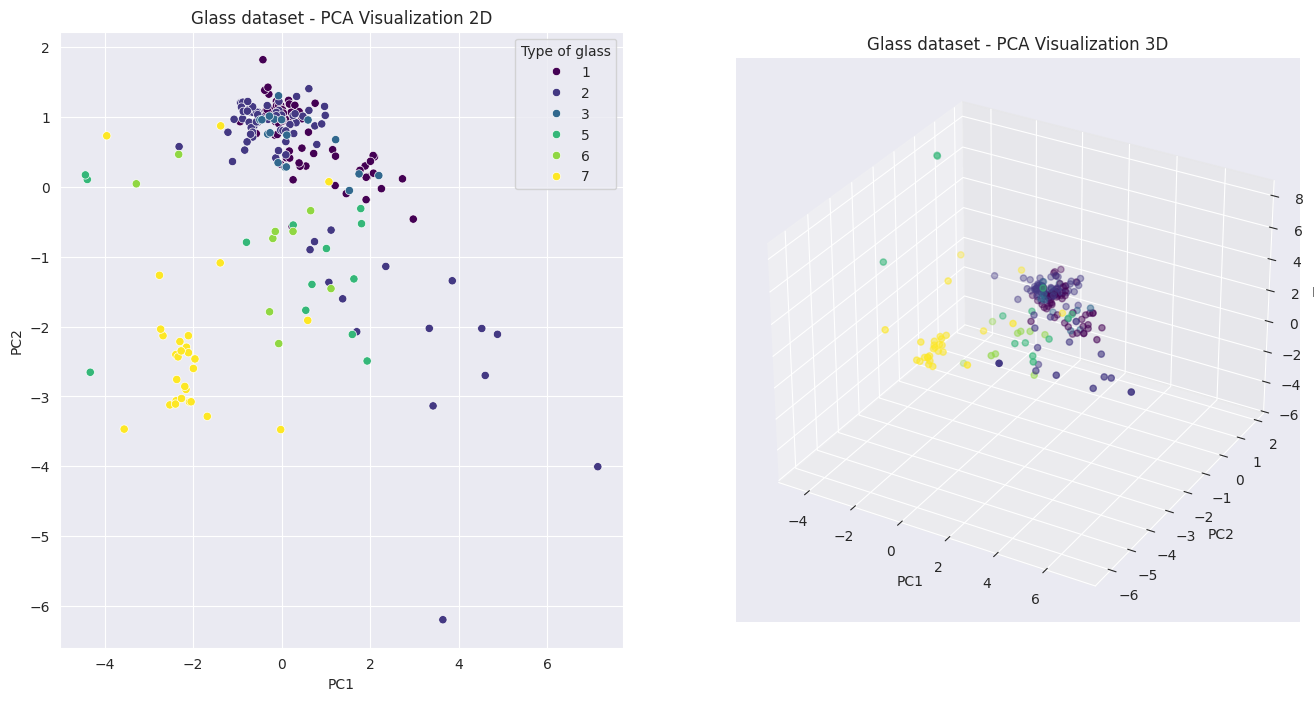

In [85]:
scaler = StandardScaler()
standardized_glass = scaler.fit_transform(glass.data.features)
data_reduced_glass_2d = PCA(n_components=2).fit_transform(standardized_glass)
data_reduced_glass_2d = pd.DataFrame(data_reduced_glass_2d, columns=["PC1", "PC2"])
data_reduced_glass_2d["Type_of_glass"] = glass_frame["Type_of_glass"]
fig = plt.figure(figsize=(16, 8))
ax1 = fig.add_subplot(121)
sns.scatterplot(data=data_reduced_glass_2d, x="PC1", y="PC2", hue="Type_of_glass", ax=ax1, palette="viridis")
ax1.legend(title="Type of glass")
ax1.set_title("Glass dataset - PCA Visualization 2D")

data_reduced_glass_3d = PCA(n_components=3).fit_transform(glass.data.features)
data_reduced_glass_3d = pd.DataFrame(data_reduced_glass_3d, columns=["PC1", "PC2", "PC3"])
data_reduced_glass_3d["Type_of_glass"] = glass_frame["Type_of_glass"]
ax2 = fig.add_subplot(122, projection="3d")
ax2.scatter(data_reduced_glass_3d["PC1"], data_reduced_glass_3d["PC2"], data_reduced_glass_3d["PC3"], c=data_reduced_glass_3d["Type_of_glass"], cmap="viridis")
ax2.set_xlabel("PC1")
ax2.set_ylabel("PC2")
ax2.set_zlabel("PC3")
ax2.set_title("Glass dataset - PCA Visualization 3D")
plt.show()